# Unit 5 - Financial Planning

In [62]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [63]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [64]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [65]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [66]:
# Fetch current BTC price
btc_price_api = requests.get(btc_url).json()
print(json.dumps(btc_price_api, indent=4, sort_keys=True))

# Compute current value of my crpto
btc_price = btc_price_api['data']['1']['quotes']['CAD']['price']
btc_value = my_btc * btc_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")

{
    "data": {
        "1": {
            "circulating_supply": 19446862,
            "id": 1,
            "last_updated": 1691061297,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "CAD": {
                    "market_cap": 769516043016.149,
                    "percent_change_1h": -0.0173004254549984,
                    "percent_change_24h": -1.25386767610296,
                    "percent_change_7d": -1.23301123359591,
                    "price": 39567.671,
                    "volume_24h": 18993040259.1215
                },
                "USD": {
                    "market_cap": 566445375794,
                    "percent_change_1h": -0.0173004254549984,
                    "percent_change_24h": -1.25386767610296,
                    "percent_change_7d": -1.23301123359591,
                    "percentage_change_1h": -0.0173004254549984,
                    "percentage_change_24h": -1.25386767610296,
                  

In [67]:
# Fetch current ETH price
eth_price_api = requests.get(eth_url).json()
print(json.dumps(eth_price_api, indent=4, sort_keys=True))

# Compute current value of my crpto
eth_price = eth_price_api['data']['1027']['quotes']['CAD']['price']
eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

{
    "data": {
        "1027": {
            "circulating_supply": 120170968,
            "id": 1027,
            "last_updated": 1691061304,
            "max_supply": 120170968,
            "name": "Ethereum",
            "quotes": {
                "CAD": {
                    "market_cap": 299600426240.973,
                    "percent_change_1h": 0.0604656183826142,
                    "percent_change_24h": -1.18802806237226,
                    "percent_change_7d": -2.32550554207724,
                    "price": 2493.06486,
                    "volume_24h": 9083371361.8505
                },
                "USD": {
                    "market_cap": 220537671138,
                    "percent_change_1h": 0.0604656183826142,
                    "percent_change_24h": -1.18802806237226,
                    "percent_change_7d": -2.32550554207724,
                    "percentage_change_1h": 0.0604656183826142,
                    "percentage_change_24h": -1.18802806237226,
            

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [68]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [69]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [83]:
# Format current date as ISO format
today = pd.Timestamp('2023-03-08', tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(tickers, timeframe, start = today ,end = today).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_investments[df_investments['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_investments[df_investments['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_investments = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])

#Display sample data
df_investments.head()

AGG                                            \
                              open   high    low  close   volume trade_count   
timestamp                                                                      
2023-03-08 05:00:00+00:00  96.9039  97.08  96.48  96.61  8044025       29262   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-03-08 05:00:00+00:00  96.716778  398.39  399.71  396.59  398.92   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-03-08 05:00:00+00:00  74767148      578475  398.260115

In [86]:
# Pick AGG and SPY close prices
agg_close_price = float(df_investments['AGG']['close'])
spy_close_price = float(df_investments['SPY']['close'])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $96.61
Current SPY closing price: $398.92


In [88]:
# Compute the current value of shares
agg_value = my_agg * agg_close_price
spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $19946.00
The current value of your 200 AGG shares is $19322.00


### Savings Health Analysis

In [89]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = btc_value + eth_value
shares = agg_value + spy_value

# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [crypto, shares]},['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,60694.448958
shares,39268.000000


<Axes: title={'center': 'My investments'}, ylabel='amount'>

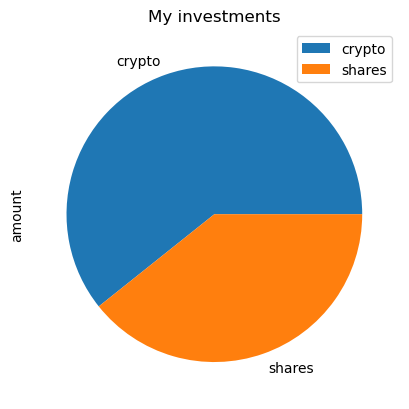

In [90]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title='My investments')

In [91]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings.sum()

# Validate saving health
if int(savings) >= emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
else:
    funds_needed = emergency_fund - int(savings)
    print(f"You are {funds_needed} dollars away from reaching your financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [92]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [93]:
# Get 5 years' worth of historical data for SPY and AGG
today = pd.Timestamp('2022-04-13', tz='America/New_York').isoformat()
start = pd.Timestamp('2017-04-13', tz='America/New_York').isoformat()

stock_data = alpaca.get_bars(tickers, timeframe, start = start ,end = today).df

# Reorganize the DataFrame
# Separate ticker data
agg_stock = stock_data[stock_data['symbol']=='AGG']
spy_stock = stock_data[stock_data['symbol']=='SPY']


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_stock, spy_stock], axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                    \
                             open    high     low    close   volume   
timestamp                                                             
2017-04-13 04:00:00+00:00  109.25  109.39  109.13  109.270  2339939   
2017-04-17 04:00:00+00:00  109.30  109.40  109.18  109.220  1646056   
2017-04-18 04:00:00+00:00  109.41  109.70  109.39  109.650  2369862   
2017-04-19 04:00:00+00:00  109.47  109.56  109.39  109.480  2148531   
2017-04-20 04:00:00+00:00  109.31  109.40  109.20  109.305  1867805   

                                                             SPY           \
                          trade_count        vwap symbol    open     high   
timestamp                                                                   
2017-04-13 04:00:00+00:00       13465  109.262713    AGG  233.64  234.490   
2017-04-17 04:00:00+00:00        7973  109.294030    AGG  233.11  234.570   
2017-04-18 04:00:00+00:00       14488  109.579396    AGG  233.72  234.490   
2017-04-19 04:00:00+00:00        9587  109.455386    AGG  234.52  234.950   
2017-04-20 04:00:00+00:00        7319  109.301387    AGG  234.15  235.845   

                                                                             \
                              low   close    volume trade_count        vwap   
timestamp                                                                     
2017-04-13 04:00:00+00:00  232.51  232.56  92880394      303955  233.364725   
2017-04-17 04:00:00+00:00  232.88  234.57  68405367      213643  233.870859   
2017-04-18 04:00:00+00:00  233.08  233.86  83225836      245279  233.958942   
2017-04-19 04:00:00+00:00  233.18  233.49  68699868      248643  233.953779   
2017-04-20 04:00:00+00:00  233.78  235.30  92572186      279885  234.978432   

                                  
                          symbol  
timestamp                         
2017-04-13 04:00:00+00:00    SPY  
2017-04-17 04:00:00+00:00    SPY  
2017-04-18 04:00:00+00:00    SPY  
2017-04-19 04:00:00+00:00    SPY  
2017-04-20 04:00:00+00:00    SPY

In [94]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years = MCSimulation (portfolio_data = df_stock_data, 
                           weights = (0.4,0.6),
                           num_simulation= 500,
                           num_trading_days=252*30)

In [95]:
# Printing the simulation input data
MC_30_years.portfolio_data.dropna().head()

AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2017-04-17 04:00:00+00:00  109.30  109.4000  109.18  109.220  1646056   
2017-04-18 04:00:00+00:00  109.41  109.7000  109.39  109.650  2369862   
2017-04-19 04:00:00+00:00  109.47  109.5600  109.39  109.480  2148531   
2017-04-20 04:00:00+00:00  109.31  109.4000  109.20  109.305  1867805   
2017-04-21 04:00:00+00:00  109.40  109.4899  109.30  109.340  1539265   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2017-04-17 04:00:00+00:00        7973  109.294030    AGG    -0.000458  233.11   
2017-04-18 04:00:00+00:00       14488  109.579396    AGG     0.003937  233.72   
2017-04-19 04:00:00+00:00        9587  109.455386    AGG    -0.001550  234.52   
2017-04-20 04:00:00+00:00        7319  109.301387    AGG    -0.001598  234.15   
2017-04-21 04:00:00+00:00        8708  109.386803    AGG     0.000320  235.25   

                                                                           \
                              high     low   close     volume trade_count   
timestamp                                                                   
2017-04-17 04:00:00+00:00  234.570  232.88  234.57   68405367      213643   
2017-04-18 04:00:00+00:00  234.490  233.08  233.86   83225836      245279   
2017-04-19 04:00:00+00:00  234.950  233.18  233.49   68699868      248643   
2017-04-20 04:00:00+00:00  235.845  233.78  235.30   92572186      279885   
2017-04-21 04:00:00+00:00  235.310  234.13  234.59  110389847      258915   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2017-04-17 04:00:00+00:00  233.870859    SPY     0.008643  
2017-04-18 04:00:00+00:00  233.958942    SPY    -0.003027  
2017-04-19 04:00:00+00:00  233.953779    SPY    -0.001582  
2017-04-20 04:00:00+00:00  234.978432    SPY     0.007752  
2017-04-21 04:00:00+00:00  234.784238    SPY    -0.003017

In [96]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 110.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 120.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 130.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 140.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 150.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 160.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 170.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 180.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 190.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 200.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 210.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 220.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 230.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 240.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 250.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 260.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 270.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 280.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 290.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 300.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 310.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 320.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 330.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 340.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 350.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 360.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 370.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 380.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 390.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 400.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 410.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 420.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 430.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 440.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 450.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 460.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 470.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 480.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 490.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995286,0.991961,0.991106,0.992726,1.012440,0.992639,0.996706,1.001108,1.001496,0.989672,...,1.003119,1.002257,1.002928,0.993572,1.005162,0.994370,0.998938,1.011460,0.983201,0.998327
2,0.990861,0.995550,0.990189,0.990121,1.018717,0.992292,1.000475,0.993622,0.999129,0.991136,...,1.009901,1.009877,1.001690,0.991672,1.010096,0.992915,0.993038,1.015673,0.985906,0.993078
3,0.986815,0.996064,0.990918,0.985331,1.011657,0.994969,0.994017,1.002523,1.007418,0.993072,...,1.008737,1.014938,1.009899,0.993783,1.015039,0.988399,0.992356,1.015201,0.989125,1.000529
4,0.987853,0.994725,0.999103,0.984196,1.006535,0.991933,1.000839,0.989266,1.007329,1.000205,...,1.002188,1.009105,1.012792,0.990815,1.022400,0.990457,0.996194,1.008982,0.974442,1.006144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.620955,7.337131,1.698791,8.113448,19.809838,11.659825,32.390735,14.963879,29.075053,9.021392,...,8.120593,17.707566,21.972503,3.964157,5.066972,27.218936,6.735809,5.965386,9.470770,26.643954
7557,14.556372,7.341709,1.679513,8.126130,19.880621,11.658899,32.370573,14.928789,29.261824,8.915229,...,8.170511,17.672744,22.000690,3.973617,5.108102,27.141302,6.767446,5.926291,9.442450,26.959729
7558,14.659318,7.321280,1.681131,8.115799,19.901861,11.717696,32.360576,14.817368,29.354227,8.892140,...,8.124244,17.764615,22.187271,3.979945,5.126782,27.299392,6.661098,5.964869,9.600611,26.726152
7559,14.765194,7.310481,1.687251,8.152730,19.792598,11.645313,32.042728,14.700673,29.407715,9.003420,...,8.195300,17.786576,22.210489,3.956725,5.085327,27.314373,6.631790,5.954275,9.655864,26.425096


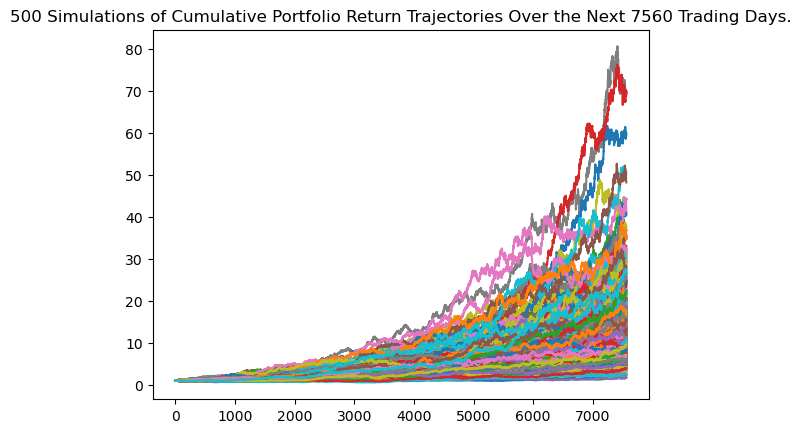

In [97]:
# Plot simulation outcomes
MC_30_years_line_plot = MC_30_years.plot_simulation()

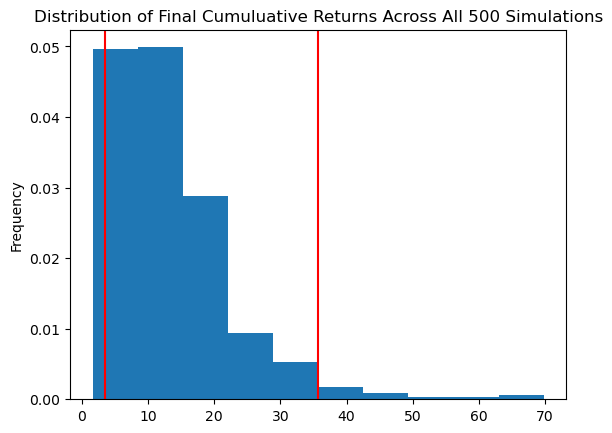

In [98]:
# Plot probability distribution and confidence intervals
MC_30_years_dist = MC_30_years.plot_distribution()

### Retirement Analysis

In [99]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30_years_stats = MC_30_years.summarize_cumulative_return()

# Print summary statistics
print(MC_30_years_stats)

count           500.000000
mean             13.432107
std               9.008747
min               1.640741
25%               7.219193
50%              11.075686
75%              16.956750
max              69.815017
95% CI Lower      3.463778
95% CI Upper     35.613439
Name: 7560, dtype: float64


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [102]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_30_years = round(MC_30_years_stats[-2]*initial_investment,2)
ci_upper_30_years = round(MC_30_years_stats[-1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30_years} and ${ci_upper_30_years}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $69275.57 and $712268.79


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [128]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_30_years = round(MC_30_years_stats[-2]*initial_investment,2)
ci_upper_30_years = round(MC_30_years_stats[-1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30_years} and ${ci_upper_30_years}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $103913.35 and $1068403.18


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [103]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_years = MCSimulation (portfolio_data = df_stock_data, 
                           weights = (0.4,0.6),
                           num_simulation= 500,
                           num_trading_days=252*5)

In [104]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_years.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
timestamp                                                             
2017-04-13 04:00:00+00:00  109.25  109.39  109.13  109.270  2339939   
2017-04-17 04:00:00+00:00  109.30  109.40  109.18  109.220  1646056   
2017-04-18 04:00:00+00:00  109.41  109.70  109.39  109.650  2369862   
2017-04-19 04:00:00+00:00  109.47  109.56  109.39  109.480  2148531   
2017-04-20 04:00:00+00:00  109.31  109.40  109.20  109.305  1867805   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2017-04-13 04:00:00+00:00       13465  109.262713    AGG          NaN  233.64   
2017-04-17 04:00:00+00:00        7973  109.294030    AGG    -0.000458  233.11   
2017-04-18 04:00:00+00:00       14488  109.579396    AGG     0.003937  233.72   
2017-04-19 04:00:00+00:00        9587  109.455386    AGG    -0.001550  234.52   
2017-04-20 04:00:00+00:00        7319  109.301387    AGG    -0.001598  234.15   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2017-04-13 04:00:00+00:00  234.490  232.51  232.56  92880394      303955   
2017-04-17 04:00:00+00:00  234.570  232.88  234.57  68405367      213643   
2017-04-18 04:00:00+00:00  234.490  233.08  233.86  83225836      245279   
2017-04-19 04:00:00+00:00  234.950  233.18  233.49  68699868      248643   
2017-04-20 04:00:00+00:00  235.845  233.78  235.30  92572186      279885   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2017-04-13 04:00:00+00:00  233.364725    SPY          NaN  
2017-04-17 04:00:00+00:00  233.870859    SPY     0.008643  
2017-04-18 04:00:00+00:00  233.958942    SPY    -0.003027  
2017-04-19 04:00:00+00:00  233.953779    SPY    -0.001582  
2017-04-20 04:00:00+00:00  234.978432    SPY     0.007752

In [105]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 450.
Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987749,1.002278,0.997837,1.012437,0.988713,0.983248,1.001234,1.006971,0.997293,1.000049,...,0.992851,0.998693,1.008234,0.987201,1.003749,0.997483,0.997469,1.013892,0.995456,1.006853
2,0.999649,0.999082,0.987096,1.021683,0.986103,0.999628,1.001373,1.008142,0.992323,1.005986,...,0.979953,0.993720,1.016382,0.991133,1.003135,0.997111,1.002038,1.020073,0.996354,1.006362
3,1.002103,1.004602,0.982667,1.026583,0.977836,0.993694,1.000104,1.015000,1.009910,1.009324,...,0.974168,1.000052,1.019928,1.001973,1.007485,0.987020,1.011752,1.022624,1.001966,1.021504
4,0.996316,1.005981,0.979872,1.029620,0.983054,0.988163,0.999429,1.020581,1.020879,1.005108,...,0.970999,1.000238,1.019671,1.003188,1.000227,0.984408,1.009122,1.019682,1.008045,1.017646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.973993,1.015516,1.544425,1.191519,1.597726,1.164172,1.717871,1.674296,1.685246,0.933513,...,1.569118,1.513475,1.468948,1.519316,1.851772,2.504619,1.671340,1.614453,1.362238,1.307016
1257,1.997677,1.018530,1.558314,1.183569,1.605405,1.154857,1.711292,1.674105,1.695233,0.939674,...,1.569491,1.503170,1.476785,1.518334,1.857170,2.512840,1.659806,1.615572,1.346838,1.327658
1258,2.008432,1.017480,1.533155,1.177902,1.608890,1.164750,1.721710,1.672387,1.720654,0.939348,...,1.560927,1.505950,1.460666,1.523247,1.846416,2.531701,1.652160,1.618369,1.356548,1.313677
1259,2.018677,1.004852,1.552109,1.190889,1.605768,1.165711,1.735225,1.662917,1.741669,0.937748,...,1.547532,1.500541,1.476685,1.523671,1.863730,2.502886,1.652184,1.614180,1.363438,1.311060


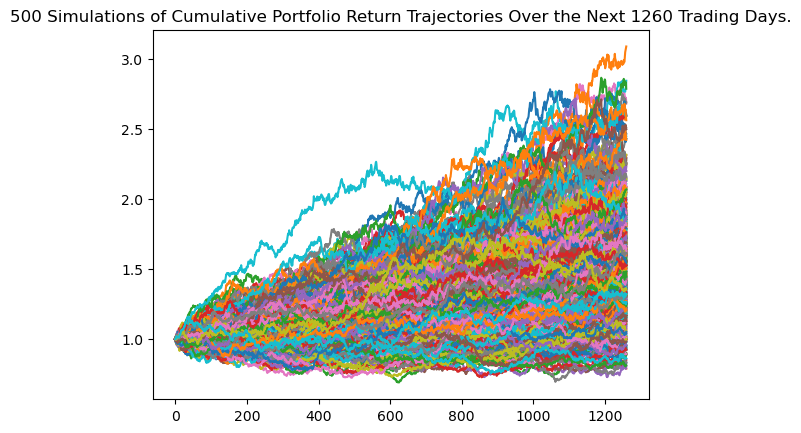

In [110]:
# Plot simulation outcomes
MC_5_years_dist = MC_5_years.plot_simulation()

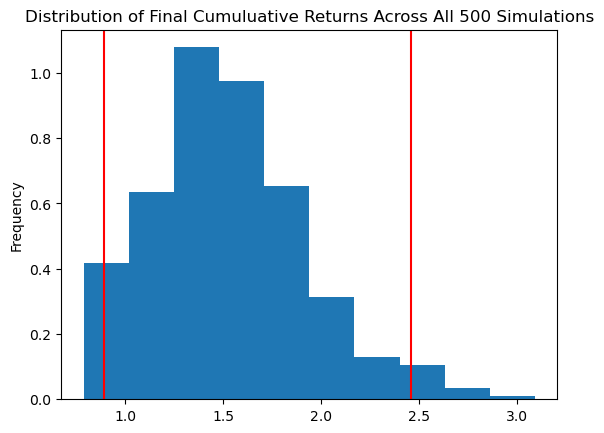

In [109]:
# Plot probability distribution and confidence intervals
MC_5_years_dist = MC_5_years.plot_distribution()

In [111]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_5_years_stats = MC_5_years.summarize_cumulative_return()

# Print summary statistics
print(MC_5_years_stats)

count           500.000000
mean              1.528597
std               0.393555
min               0.790309
25%               1.257959
50%               1.496575
75%               1.752810
max               3.090521
95% CI Lower      0.892449
95% CI Upper      2.458221
Name: 1260, dtype: float64


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [116]:
# Set initial investment
investment_5_years = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5_years = round(MC_5_years_stats[-2]*investment_5_years,2)
ci_upper_5_years = round(MC_5_years_stats[-1]*investment_5_years,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5_years} and ${ci_upper_5_years}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $53546.94 and $147493.23


### Ten Years Retirement Option

In [117]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years = MCSimulation (portfolio_data = df_stock_data, 
                           weights = (0.4,0.6),
                           num_simulation= 500,
                           num_trading_days=252*10)

In [118]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
timestamp                                                             
2017-04-13 04:00:00+00:00  109.25  109.39  109.13  109.270  2339939   
2017-04-17 04:00:00+00:00  109.30  109.40  109.18  109.220  1646056   
2017-04-18 04:00:00+00:00  109.41  109.70  109.39  109.650  2369862   
2017-04-19 04:00:00+00:00  109.47  109.56  109.39  109.480  2148531   
2017-04-20 04:00:00+00:00  109.31  109.40  109.20  109.305  1867805   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2017-04-13 04:00:00+00:00       13465  109.262713    AGG          NaN  233.64   
2017-04-17 04:00:00+00:00        7973  109.294030    AGG    -0.000458  233.11   
2017-04-18 04:00:00+00:00       14488  109.579396    AGG     0.003937  233.72   
2017-04-19 04:00:00+00:00        9587  109.455386    AGG    -0.001550  234.52   
2017-04-20 04:00:00+00:00        7319  109.301387    AGG    -0.001598  234.15   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2017-04-13 04:00:00+00:00  234.490  232.51  232.56  92880394      303955   
2017-04-17 04:00:00+00:00  234.570  232.88  234.57  68405367      213643   
2017-04-18 04:00:00+00:00  234.490  233.08  233.86  83225836      245279   
2017-04-19 04:00:00+00:00  234.950  233.18  233.49  68699868      248643   
2017-04-20 04:00:00+00:00  235.845  233.78  235.30  92572186      279885   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2017-04-13 04:00:00+00:00  233.364725    SPY          NaN  
2017-04-17 04:00:00+00:00  233.870859    SPY     0.008643  
2017-04-18 04:00:00+00:00  233.958942    SPY    -0.003027  
2017-04-19 04:00:00+00:00  233.953779    SPY    -0.001582  
2017-04-20 04:00:00+00:00  234.978432    SPY     0.007752

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 300.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 410.
Running Monte Carlo simulation number 420.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 450.
Running Monte Carlo simulation number 460.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 470.
Running Monte Carlo simulation number 480.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

Running Monte Carlo simulation number 490.


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

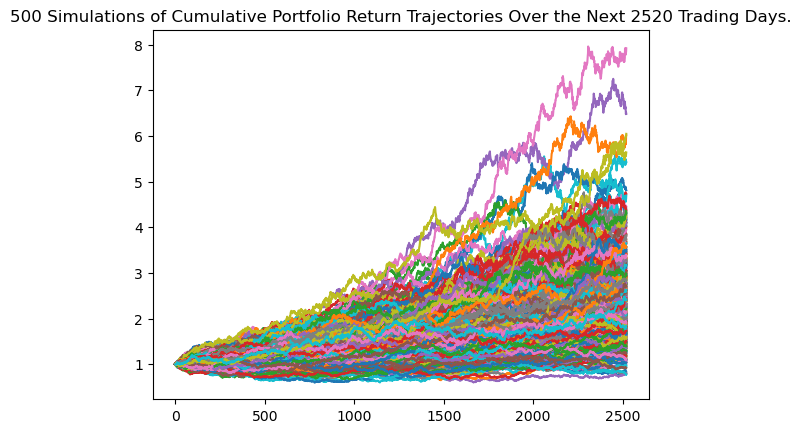

In [119]:
# Plot simulation outcomes
MC_10_years_outcome = MC_10_years.plot_simulation()

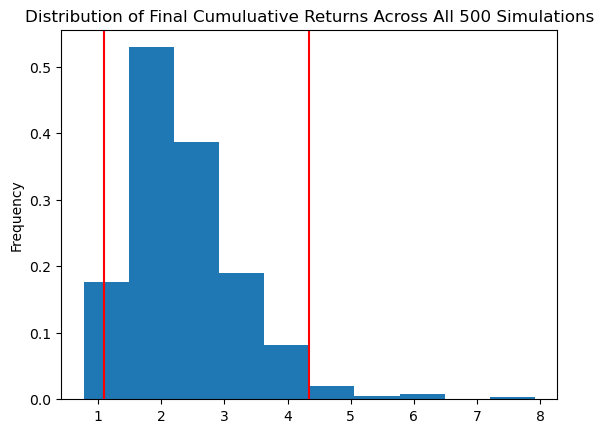

In [122]:
# Plot probability distribution and confidence intervals
MC_10_years_dist_plot = MC_10_years.plot_distribution()

In [125]:
# Fetch summary statistics from the Monte Carlo simulation results
results = MC_10_years.summarize_cumulative_return()

# Print summary statistics
print(results)

count           500.000000
mean              2.353322
std               0.901564
min               0.773349
25%               1.739414
50%               2.178275
75%               2.782141
max               7.917152
95% CI Lower      1.088773
95% CI Upper      4.341274
Name: 2520, dtype: float64


/Users/jennyvu/FINTECH_BootCamp/Week 5/Homework/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [127]:
# Set initial investment
investment_10_years = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10_years = round(results[-2]*investment_10_years,2)
ci_upper_10_years = round(results[-1]*investment_10_years,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10_years} and ${ci_upper_10_years}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $65326.39 and $260476.47
